<a href="https://colab.research.google.com/github/Vedantbhor2110/B.E-Mumbai-University-Second-Year/blob/master/trader_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# Load datasets
trader_df = pd.read_csv('/content/historical_data.csv')
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')


In [6]:
# Convert trader timestamp to datetime and extract just the date
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

# Convert sentiment date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Merge both datasets on date
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='inner')


In [7]:
merged_df[['Account', 'Execution Price', 'Size USD', 'Side', 'Closed PnL', 'date', 'classification']].head()


,Account,Execution Price,Size USD,Side,Closed PnL,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9769,7872.16,BUY,0.0,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9800,127.68,BUY,0.0,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9855,1150.63,BUY,0.0,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9874,1142.04,BUY,0.0,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9894,69.75,BUY,0.0,2024-12-02,Extreme Greed


In [8]:
sentiment_summary = merged_df.groupby('classification').agg({
    'Closed PnL': ['mean', 'sum', 'count'],
    'Size USD': 'mean'
}).reset_index()

# Rename columns
sentiment_summary.columns = ['Sentiment', 'Avg Closed PnL', 'Total PnL', 'Trade Count', 'Avg Trade Size']

# Show summary
sentiment_summary


,Sentiment,Avg Closed PnL,Total PnL,Trade Count,Avg Trade Size
0,Extreme Fear,34.537862,7.391102e+05,21400,5349.731843
1,Extreme Greed,67.892861,2.715171e+06,39992,3112.251565
2,Fear,54.290400,3.357155e+06,61837,7816.109931
3,Greed,42.743559,2.150129e+06,50303,5736.884375
4,Neutral,34.307718,1.292921e+06,37686,4782.732661


/tmp/ipython-input-9-3079754663.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Avg Closed PnL', data=sentiment_summary, palette='coolwarm')


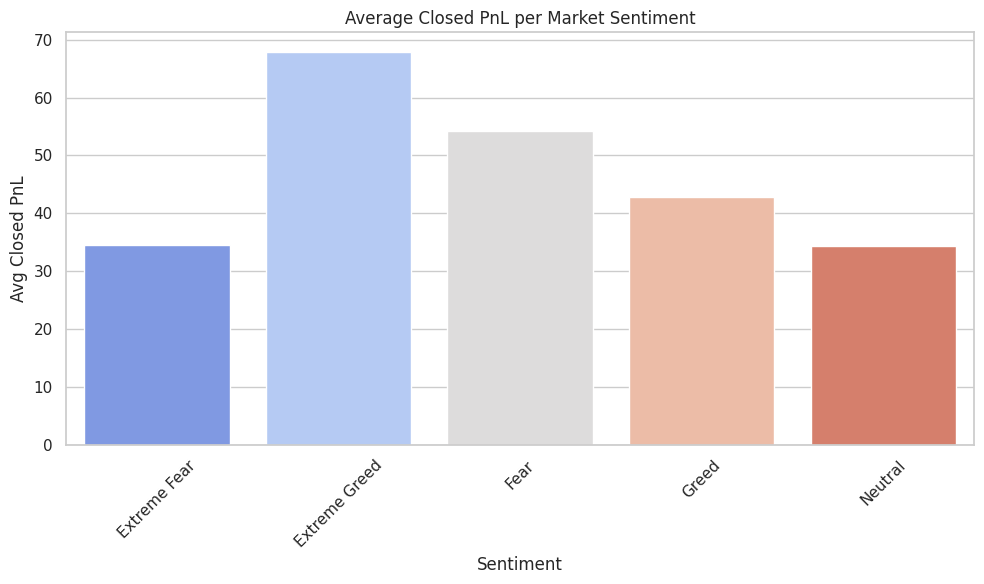

/tmp/ipython-input-9-3079754663.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Total PnL', data=sentiment_summary, palette='viridis')


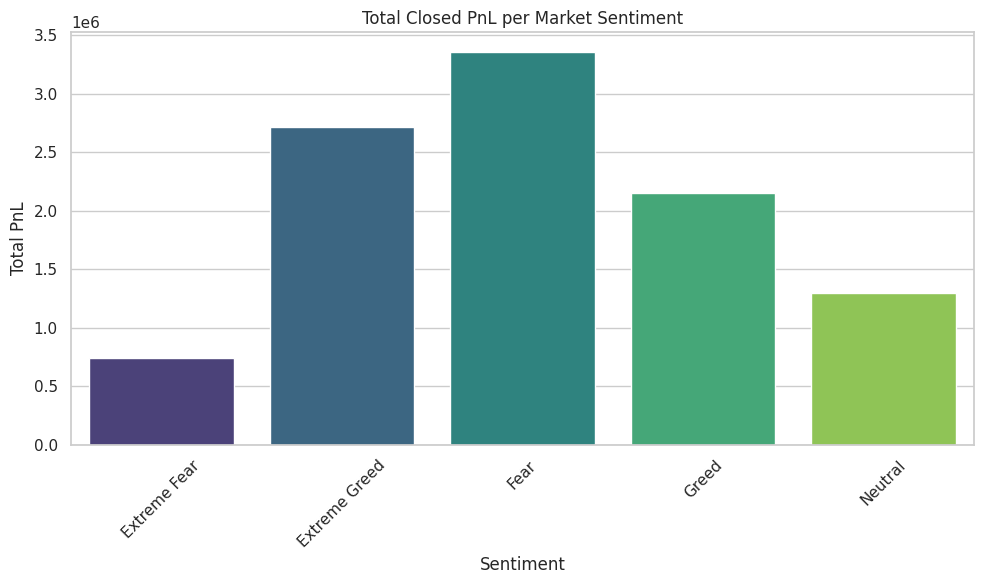

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Bar plot for Avg PnL
sns.barplot(x='Sentiment', y='Avg Closed PnL', data=sentiment_summary, palette='coolwarm')
plt.title('Average Closed PnL per Market Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot for Total PnL
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='Total PnL', data=sentiment_summary, palette='viridis')
plt.title('Total Closed PnL per Market Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


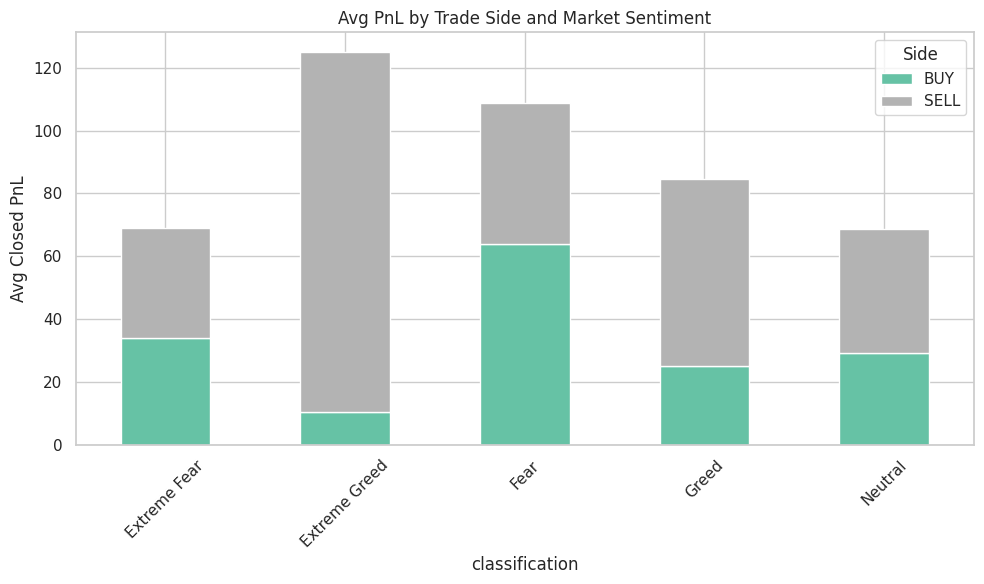

In [10]:
side_summary = merged_df.groupby(['classification', 'Side'])['Closed PnL'].mean().unstack()
side_summary.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Avg PnL by Trade Side and Market Sentiment')
plt.ylabel('Avg Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
top_accounts = merged_df[merged_df['classification'].str.contains('Greed')].groupby('Account')['Closed PnL'].sum().sort_values(ascending=False).head(10)
top_accounts


,Closed PnL
Account,
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,1.639363e+06
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,7.222110e+05
0x72743ae2822edd658c0c50608fd7c5c501b2afbd,4.535953e+05
0x430f09841d65beb3f27765503d0f850b8bce7713,3.519654e+05
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,3.066642e+05
0x083384f897ee0f19899168e3b1bec365f52a9012,2.364369e+05
0x4f93fead39b70a1824f981a54d4e55b278e9f760,2.082412e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1,1.630477e+05
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,1.392026e+05


In [12]:
merged_df.to_csv("merged_trading_sentiment_data.csv", index=False)
